## Исследование данных о российском кинопрокате



Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.


Обратим внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 
Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.


### Изучение данных 

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format

In [213]:
try:
    mkrf_movies = pd.read_csv('data/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('data/mkrf_shows.csv')
except:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

pd.set_option('display.max_columns', None)
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [214]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [215]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


In [216]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Столбец `puNumber` таблицы `mkrf_movies` принадлежит типу `object`. Перед соединением таблиц проверим, почему столбец принадлежит типу к `object` приведем столбец к нужному типу данных 

In [217]:
# Проверяем, есть ли в столбце значения, в которых содержатся буквы
mkrf_movies[mkrf_movies['puNumber'].str.isalpha()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


У нас есть один фильм, у которого нет прокатного номера. Удалим его

In [218]:
mkrf_movies = mkrf_movies.drop(index=1797)
mkrf_movies[mkrf_movies['puNumber'].str.isalpha()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


In [219]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64')

data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


##### Вывод:

При первичном осмотре, мы можем заметить, что большинство данных не приведено к парвильному типу данных, а так же некоторые столбцы не приведены к единому стилю. Перед соеденением датасетов мы проверили, нет ли у нас проблемных данных в столбце `pu_number`, и обнаружили 1 проблемную строчку, которую мы удалили

### Предобработка данных

#### Проверка типов данных

In [220]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В первую очередь приведем названия столбцов к единому стилю.

Изменим тип данных в следующих столбцах:
- `show_start_date` приведем к типу `datetime64`
- `age_restriction` приведем к типу `int32`
- `ratings` приведем к типу `float32`
- `refundable_support` приведем к типу `int32`
- `nonrefundable_support` приведем к типу `int32`
- ``

In [222]:
# Переименовываем столбцы
data = data.rename(columns={
    'puNumber': 'pu_number',
    'type': 'film_type',
    'ratings': 'rating'
})

In [223]:
# Смотрим, какие значения есть в ограничении по возрасту
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [224]:
# Смотрим, из-за каких значений столбец принадлежит к object
data['rating'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Из-за того, что некоторый рейтинг представлен не в виде десятичного числа, а в виде n%. Рейтинг в процентах представлен в виде строки, из-за чего весь столбец принадлежит к типу `object` 

In [225]:
def age_restriction_revise(age):
    if '18' in age:
        return 18
    if '16' in age:
        return 16
    if ' 12' in age:
        return 12
    if '6' in age:
        return 6
    if '0' in age:
        return 0


data['pu_number'] = data['pu_number'].astype('int64')

data['age_restriction'] = data['age_restriction'].apply(age_restriction_revise)
data['age_restriction'] = data['age_restriction'].astype('int64')

data['rating'] = data['rating'].str.replace('%', '.0').astype('float32')
data.loc[data['rating'] > 10, 'rating'] = data.loc[data['rating'] > 10, 'rating'] / 10

data['show_start_date'] = pd.to_datetime(pd.to_datetime(data['show_start_date']).dt.date)

data.head()

,title,pu_number,show_start_date,film_type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [226]:
# Проверяем, нет ли проблем со столбцом rating
data['rating'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8], dtype=float32)

In [227]:
# int8 [-128;127]
# int16 [-32768; 32767]
# int32 [-2 147 483 648; 2 147 483 647]
# int64 [-2^63; 2^63-1]

# Перед приведением к int нам необходимо заполнить пропуски, 
# потому что np.nan принадлежит к float и у нас будет ошибка. 
# Заполним пропуски на -1 для удобной сортировки вдальнейшем
data['pu_number'] = data['pu_number'].astype('int64')
data['age_restriction'] = data['age_restriction'].astype('int8')
data['budget'] = data['budget'].fillna(-1).astype('int64')
data['refundable_support'] = data['refundable_support'].fillna(-1).astype('int64')
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(-1).astype('int64')

#Проверяем, к каким типам данных привелись столбцы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   pu_number              7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   film_type              7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   int8          
 9   refundable_support     7485 non-null   int64         
 10  nonrefundable_support  7485 non-null   int64         
 11  budget                 7485 non-null   int64         
 12  financing_source       332 non-null    object        
 13  rat

##### Вывод:
- `pu_number`приведен к типу `int64`
- `show_start_date` приведен к типу `datetime64`
- `age_restriction` приведен к типу `int8` для экономии памяти 
- `ratings` приведен к типу `float16`
- `refundable_support` приведен к типу `int64`, потому что нам не важны копейки
- `nonrefundable_support` приведен к типу `int64`, аналогично
- `box_office` приведен к типу `int64`, аналогично
- `budget` приведен к типу `int64`, аналогично

#### Изучение пропусков

До этого мы заполнили пропуски на `-1`, в столбцах с числовыми значениями, чтобы корректно привести их к определенному типу данных. Посмотрим, какие пропуски у нас остались

In [228]:
# Проверим количество пропусков в каждом столбце
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
film_type                   0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source         7153
rating                    966
genres                    975
box_office               4327
dtype: int64

У нас есть пропуски в следующих столбцах:
- `film_studio` 18 пропусков. Восстановить данные пропуски мы не сможем, оставим их, так как нам данные в этом столбце не понадобятся нам для анализа
- `production_country` 2 пропуска. Для дальнейшего исследовательского анализа заполним пропуски на `Unknown`
- `director` имеет 9 пропусков. Поступим аналогично столбцу `production_country`
- `producer` имеет 568 пропусков. Поступим аналогично столбцу `production_country`
- `financing_source` 7153 пропусков. Фильмы с пропусками в данном столбце не получили государственную поддержку. Пропуски в данном столбце мы не можем заполнить, однако мы можем создать отдельный столбце с фильмами, которые получили государственную поддержку. Сделаем это после полной предобработки данных
- `rating` имеет 966 пропусков. Оставим пропуски в данном столбце, ибо мы никак не сможем их заполнить
- `generes`имеет 975 пропусков. Поступим аналогично столбцу `production_country`

In [229]:
# Посмотрим фильмы, в которых у нас 
data[data['production_country'].isna()]

,title,pu_number,show_start_date,film_type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",0,-1,-1,-1,NaN,7.2,"детский,комедия","194,527.0"
4440,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,0,-1,-1,-1,NaN,4.0,"мультфильм,комедия",NaN


Данные пропуски мы можем удалить, ибо они не несут никакой информации, кроме рейтинга. Во всех критичных для нас столбцах у нас пропуски. Для сериала ералаш у нас указаны сборы, однако так как это сериал, то рождается теория, что это сборы в минуту.

In [230]:
data = data.drop(index=[3185, 4440])
data = data.reset_index(drop=True)  # сбрасываем индексы
data.head()

,title,pu_number,show_start_date,film_type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,-1,-1,-1,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6,-1,-1,-1,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,-1,-1,-1,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,-1,-1,-1,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,-1,-1,-1,NaN,6.8,"фантастика,боевик,триллер",NaN


In [231]:
data['director'] = data['director'].fillna('Unknown')
data['producer'] = data['producer'].fillna('Unknown')
data['genres'] = data['genres'].fillna('Unknown')

data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
film_type                   0
film_studio                17
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source         7151
rating                    966
genres                      0
box_office               4326
dtype: int64

##### Вывод

Мы заполнили пропуски в следующих столбцах:
- `production_country` удалили `2` пропуска, ибо данные в остальных столбцах отсутствуют
- `director` заполнили `9` пропусков значением `Unknown`
- `producer` заполнили `568` пропусков значением `Unknown`
- `generes`заполнили `975` пропусков значением `Unknown`

В остальных столбцах мы не смогли заполнить пропуски, потому что у нас недостаточно данных, чтобы корректно заполнить их. После предобработки данных мы создадим новую таблицу в которую перенесем строки, у которых нет пропусков в столбце `financing_source`. В столбце `box_office` у нас `4326` пропусков, которые обоснованы тем, что некоторые фильмы решили не публиковать данные о сборах

#### Изучение дубликатов

In [232]:
# Посмотрим количество явных дубликатов в датасете
data.duplicated().sum()

np.int64(0)

В датасете отсутствуют явные дубликаты. У нас могут возникнуть дубликаты в столбцах с названием фильма и прокатным удостоверением, проверим их

In [233]:
print('Title duplicate:', data['title'].duplicated().sum())
print('Pu_number duplicate:', data['pu_number'].duplicated().sum())

Title duplicate: 714
Pu_number duplicate: 2


У нас есть 714 дубликатов в столбце с названием фильма. Взглянем на них 

In [234]:
data[data['title'].duplicated()][['title', 'pu_number', 'show_start_date', 'rating', 'box_office']]

,title,pu_number,show_start_date,rating,box_office
3,Особо опасен,221026916,2016-06-10,6.8,NaN
4,Особо опасен,221030815,2015-07-29,6.8,NaN
41,Алекс и Эмма,221004616,2016-02-09,6.4,NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23,7.7,"759,526.0"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23,8.2,"1,125,302.0"
...,...,...,...,...,...
7366,Невиновен,111019319,2019-11-07,7.5,NaN
7413,"Отель ""Гранд Будапешт""",121035119,2019-12-13,7.9,NaN
7435,Зверь,121035919,2019-12-05,6.5,"175,003.5"
7447,В тихом омуте,121036919,2019-12-09,6.8,NaN


Мы видим, что дубликаты появились по той причине, что одна и та же картина выходила в прокат в разное время. Рейтинг картины не изменялся, однако в некоторых случаях у картины указаны сборы, а в некоторых нет. Так как нам нужно проанализировать, как менялся рынок кинопроката со временем, а не изучить картины, то оставим эти дубликаты. Псмотрим дубликаты в прокатном удостовернее

In [235]:
data['box_office'] = data['box_office'].fillna(0)

data[data['pu_number'].duplicated()]

,title,pu_number,show_start_date,film_type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genres,box_office
4636,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",16,-1,-1,-1,NaN,7.6,"драма,мелодрама,история",0.0
5065,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12,-1,-1,-1,NaN,6.8,"комедия,криминал",0.0


In [236]:
data.query('pu_number in (221154310, 221054410)')

,title,pu_number,show_start_date,film_type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genres,box_office
4635,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",16,-1,-1,-1,NaN,7.0,"мелодрама,комедия",0.0
4636,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",16,-1,-1,-1,NaN,7.6,"драма,мелодрама,история",0.0
5064,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",16,-1,-1,-1,NaN,7.4,"комедия,криминал",0.0
5065,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12,-1,-1,-1,NaN,6.8,"комедия,криминал",0.0


Всего у нас 4 фильма, у которых одинаковые прокатные удостоверения. Удалим их, потому что в важных для нас столбцах данные отсутствуют. У данных фильмов нет ни данных о сборах, ни данных о поддержке, ни данных о бюджете

In [237]:
data = data.drop(data[data['pu_number'] == 221154310].index)
data = data.drop(data[data['pu_number'] == 221054410].index)

data.query('pu_number in (221154310, 221054410)')

,title,pu_number,show_start_date,film_type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genres,box_office


##### Вывод:

В таблицы были неявные дубликаты в столбцах `titile` и `pu_number`. Их появление в столбце `titile` обусловлено тем, что один и тот же фильм выходил в разное время, и, следовательно, получал разное прокатное удостоверение. Рейтинг у всех дубликатов был одинаковый, но разные сборы в столбце `box_office`. Мы оставили эти дубликаты

В столбце `pu_number` было обнаружено всего 4 дубликата, мы удалили их, потому что у этих фильмов нет значимых для нас данных, таких как информация о сборах, бюджете, и государственной поддержке.

#### Изучение категориальных значений

Посмотрим, как у нас представлены данные в категориальных столбцах. Всего у нас есть 8 категориальных столбцов:
- `film_type`
- `film_studio`
- `production_country`
- `director`
- `producer`
- `age_restriction`
- `financing_source`
- `genres`

Столбец `age_restriction` мы уже обработали. Посмотрим, какие данные у нас представлены в других столбцах

In [238]:
data[['title', 'film_type', 'film_studio', 'production_country', 'director', 'producer', 'financing_source', 'genres']]

,title,film_type,film_studio,production_country,director,producer,financing_source,genres
0,Открытый простор,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",NaN,"боевик,драма,мелодрама"
1,Особо важное задание,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,NaN,"драма,военный"
2,Особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",NaN,"фантастика,боевик,триллер"
3,Особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",NaN,"фантастика,боевик,триллер"
4,Особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",NaN,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...
7478,Сад художника: Американский импрессионизм,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,NaN,Unknown
7479,Звериная ярость,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",NaN,"боевик,триллер"
7480,Щенячий патруль: Скорей спешим на помощь!,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,NaN,Unknown
7481,"Машины песенки. Серия ""Испанские мотивы""",Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,NaN,Unknown


In [239]:
# Посмотрим уникальные значение столбца film_type
data['film_type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [240]:
# Уберем пробелы перед типами фильма
data['film_type'] = data['film_type'].str.strip()
data['film_type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [241]:
# Посмотрим уникальные значение столбца production_country 
print(data['production_country'].nunique())
data['production_country'].unique()

950


array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

В данном столбце мы наблюдаем проблему, что данные представлены по-разному:
- Страна-Страна-...-Страна
- Страна - Страна - ... - Страна
- Страна,  Страна,  ...,  Страна
- Страна, Страна, ..., Страна

Приведем все к единому типу "Страна, Страна, ..., Страна"

In [242]:
for _ in ('-', ' - ', ' ,', ',  '):
    data['production_country'] = data['production_country'].str.replace(_, ', ')
data['production_country'] = data['production_country'].str.replace(',  ',
                                                                    ', ')  # Я не понимаю, но даже при переборе, подобное не устраняется
data['production_country'] = data['production_country'].str.strip()
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия, Великобритания', 'Великобритания, Италия',
       'Чехословакия', 'США, Франция, Турция', 'Новая Зеландия',
       'Канада, Франция, Испания', 'США, Германия', 'США, Великобритания',
       'Великобритания', 'Франция, Мексика, США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания, США, Германия, КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США, Франция', 'США, Япония, Франция, Великобритания',
       'Гонконг, Сингапур, Таиланд, Великобритания', 'США, Канада',
       'Франция, Италия, Великобритания, США', 'Франция, США',
       'Ирландия, Великобритания, Германия', 'Чехия', 'США, Австралия',
       'СССР, Финляндия', 'США, Франция, Великобритания, Австрия',
       'США, Бельгия', 'США, Ирландия, Великобритания',
       'Великобритания, США',
       'Люксембург, Нидерланды, Испания, Великобритания,

In [243]:
print(data['director'].nunique())
print(data['director'].unique())

4810
['Кевин Костнер' 'Е.Матвеев' 'Тимур Бекмамбетов' ... 'Ник Пауэлл'
 'А.Беляев' 'И.Трусов']


In [244]:
print(data['producer'].nunique())
data['producer'].unique()

5349


array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'Unknown',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [245]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [246]:
print(data['genres'].nunique())
data['genres'].unique()

743


array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'Unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

###### Вывод:

Самая большая проблема в том, что данные в категориальных столбцах не приведены к единому стилю

- `film_type` — мы убрали пробелы перед и после слов. 
- `film_studio` — мы ничего сделать не смогли, там слишком много значений, чтобы увидеть паттерны
- `production_country` — мы привели все значения к единому стилю `Страна, Страна, ..., Страна`
- `director` — мы ничего сделать не смогли, там слишком много значений, чтобы увидеть паттерны. Проблема в том, что для некоторых фильмов у нас указано полная имя фамилия, для некоторых только первая буква имени
- `producer` — мы ничего сделать не смогли, там слишком много значений, чтобы увидеть паттерны
- `age_restriction` был приведен к int для облегчения исследовательского анализа
- `financing_source` — никаких изменений не потребовалось
- `genres` — никаких изменений не потребовалось

Все столбцы мы постарались привести к единому стилю для дальнейшей обработки

#### Проверка количественных значений

Всего у нас есть 4 столбца с количественными значениями:
- `refundable_support` 
- `nonrefundable_support`
- `budget`
- `box_office`

In [247]:
data[['title', 'refundable_support', 'nonrefundable_support', 'budget', 'box_office']].sort_values(by='budget',
                                                                                                   ascending=False)

,title,refundable_support,nonrefundable_support,budget,box_office
7111,Тайна Печати Дракона,180000000,90000000,2305074303,"333,597,059.6"
5434,Матильда,110000000,190000000,1032905957,"511,775,548.0"
7461,Союз спасения,100000000,400000000,980000000,"717,703,185.5"
7471,Вторжение,100000000,400000000,944000000,0.0
7168,Грех,0,60000000,779941965,"54,243,202.7"
...,...,...,...,...,...
7478,Сад художника: Американский импрессионизм,-1,-1,-1,0.0
7479,Звериная ярость,-1,-1,-1,0.0
7480,Щенячий патруль: Скорей спешим на помощь!,-1,-1,-1,0.0
7481,"Машины песенки. Серия ""Испанские мотивы""",-1,-1,-1,0.0


In [248]:
# Создадим столбец, в котором будет сумма возвратной и невозвратной государственной поддержки
data['full_support'] = data['refundable_support'] + data['nonrefundable_support']
data.query('full_support > budget')[['title', 'full_support', 'budget', 'box_office']]

,title,full_support,budget,box_office
2052,14+,23000000,0,"10,234,016.1"
2057,Дуxless 2,75000000,0,"446,163,511.0"
2471,Воин (2015),80000000,0,"196,572,438.4"
2531,Бармен.,20000000,0,"67,418,974.8"
2614,Савва. Сердце воина,160000000,0,"184,487,551.4"
2683,Тряпичный союз,59000000,0,"1,957,738.5"
2787,Срочно выйду замуж,35000000,0,"72,937,783.2"
2873,Помню - не помню!,6000000,0,"15,362,931.4"
3046,Любовь с ограничениями,70000000,0,"70,299,052.0"
3563,Притяжение (2016),250000000,0,"1,038,321,489.0"


In [249]:
data.loc[data['full_support'] > data['budget'], 'budget'] = data.loc[
    data['full_support'] > data['budget'], 'full_support']
# data.loc[data['full_support'] >= data['budget'], 'budget']
data.query('full_support >= budget')[['title', 'full_support', 'budget', 'box_office']]

,title,full_support,budget,box_office
2052,14+,23000000,23000000,"10,234,016.1"
2057,Дуxless 2,75000000,75000000,"446,163,511.0"
2471,Воин (2015),80000000,80000000,"196,572,438.4"
2531,Бармен.,20000000,20000000,"67,418,974.8"
2614,Савва. Сердце воина,160000000,160000000,"184,487,551.4"
2683,Тряпичный союз,59000000,59000000,"1,957,738.5"
2787,Срочно выйду замуж,35000000,35000000,"72,937,783.2"
2873,Помню - не помню!,6000000,6000000,"15,362,931.4"
3046,Любовь с ограничениями,70000000,70000000,"70,299,052.0"
3563,Притяжение (2016),250000000,250000000,"1,038,321,489.0"


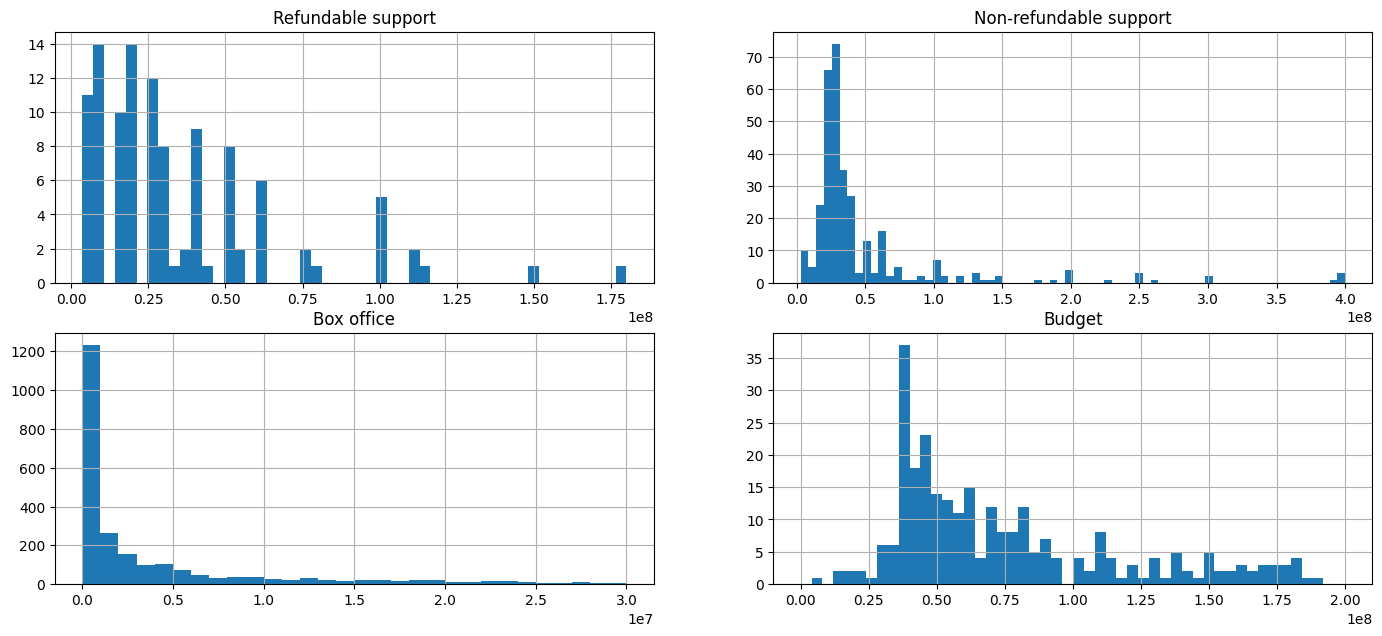

In [250]:
# Ранее мы заполнили пропуски на -1, чтобы впоследствии отфильтровать их
plt.figure(figsize=(17, 15))

plt.subplot(4, 2, 1)
plt.grid()
plt.hist(data[data['refundable_support'] > 0]['refundable_support'], bins=50)
plt.title('Refundable support')

plt.subplot(4, 2, 2)
plt.grid()
plt.hist(data[data['nonrefundable_support'] > 0]['nonrefundable_support'], bins=70)
plt.title('Non-refundable support')

plt.subplot(4, 2, 3)
plt.grid()
plt.hist(data[data['box_office'] > 0]['box_office'], bins=30, range=(0, 3 * 10 ** 7))
plt.title('Box office')

plt.subplot(4, 2, 4)
plt.grid()
plt.hist(data[data['budget'] > 0]['budget'], bins=50, range=(0, 2 * 10 ** 8))
plt.title('Budget')

plt.show()

Все данные выглядят правдоподобно, однако мы можем наблюдать выброс около нуля для сборов кинофильмов. Ранее мы поняли, что для некоторых фильмов сборы указаны за одну минуту фильма, что объясняет выбросы около нуля, рассмотрим их детальнее

count           3,133.0
mean       77,088,901.4
std       241,212,971.0
min                40.0
25%           100,805.0
50%         2,413,090.2
75%        24,605,374.1
max     3,073,568,690.8
Name: box_office, dtype: float64


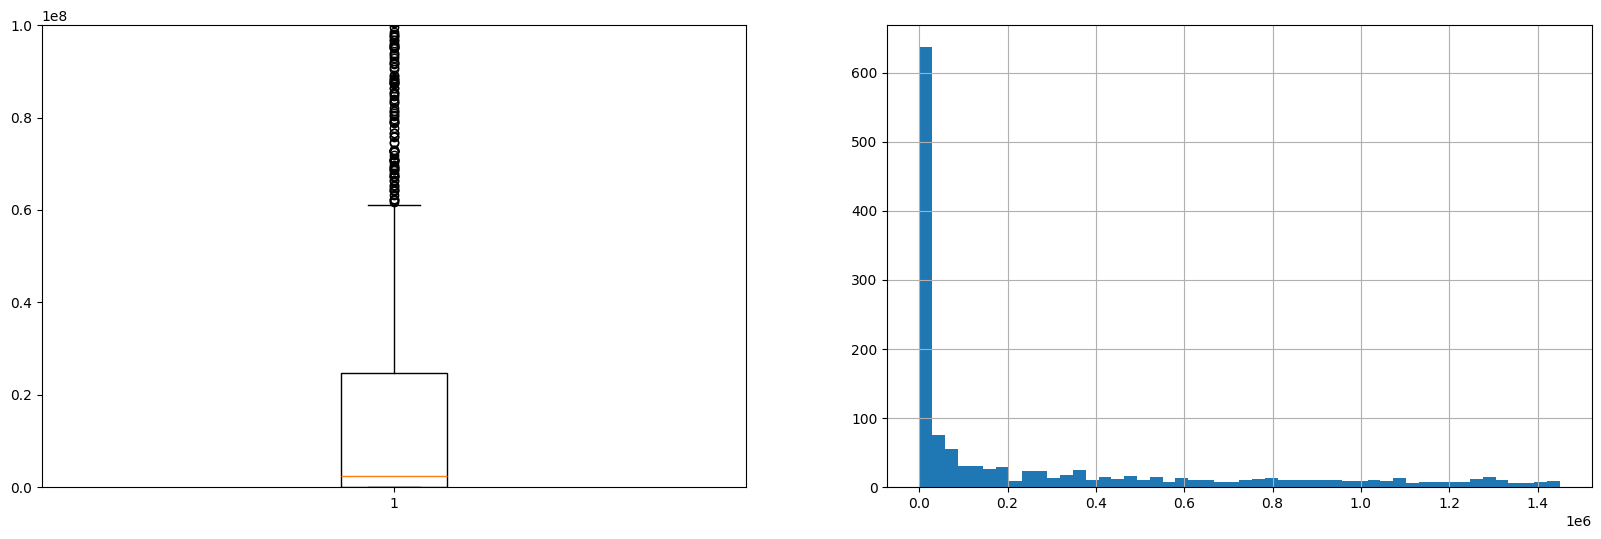

In [251]:
print(data[data['box_office'] > 0]['box_office'].describe())
# print(data['box_office'].describe())

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data[data['box_office'] > 0]['box_office'])
# data.boxplot(column='box_office', figsize=(12, 9))
plt.ylim(0, 10 ** 8)

plt.subplot(1, 2, 2)
plt.hist(data[data['box_office'] > 0]['box_office'], bins=50, range=(0, 1450000))

plt.grid()
plt.show()

Мы видим, что гистограмма редеет после ~200 000, то возьмем это число за границу, которая отделяет фильмы, со сборами, указанными за минуту фильма, от сборов, указанных за весь фильм

###### Вывод:

У нас в датасете было 17 строк, у которых бюджет фильма меньше, чем государственная поддержка. Точнее, бюджет вообще не указан. Восстановить данные мы не можем, поэтому мы заполнили пропуски суммой, равной полной поддержки государства.
Государство спонсирует фильмы на "круглые" фиксированные суммы, то есть `100 000 000` и `150 000 000`.

В столбце `box_office` У нас представлено 2 вида кассовых сборов. За весь фильм и за минуту фильма. Мы определили границу в `200 000`, до которой сборы идут за минуту фильма, а после — за весь фильм  

#### Добавление новых столбцов

In [252]:
# создадим отдельный стобец для
data['year'] = data['show_start_date'].dt.year
data['year'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: year, dtype: int32

In [253]:
# Создадим функцию, которая выделяет первый жанр
def extract_main(string):
    main = string.split(',')
    return main[0].strip()


data['main_country'] = data['production_country'].apply(
    extract_main)  # предположим, что страна, которая указана первой, внесла наибольший вклад в производство
data['main_director'] = data['director'].apply(extract_main)
data['main_genre'] = data['genres'].apply(extract_main)

data[['director', 'main_director', 'genres', 'main_genre', 'production_country', 'main_country']]

,director,main_director,genres,main_genre,production_country,main_country
0,Кевин Костнер,Кевин Костнер,"боевик,драма,мелодрама",боевик,США,США
1,Е.Матвеев,Е.Матвеев,"драма,военный",драма,СССР,СССР
2,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика,США,США
3,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика,США,США
4,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика,США,США
...,...,...,...,...,...,...
7478,Фил Грабски,Фил Грабски,Unknown,Unknown,Великобритания,Великобритания
7479,Ник Пауэлл,Ник Пауэлл,"боевик,триллер",боевик,США,США
7480,Чарльз Е.Бастьен,Чарльз Е.Бастьен,Unknown,Unknown,"США, Канада",США
7481,А.Беляев,А.Беляев,Unknown,Unknown,"Республика Кипр, Россия",Республика Кипр


In [254]:
# Посмотрим, сколько у нас уникальных жанров осталось
print(data['main_genre'].nunique())
data['main_genre'].unique()

29


array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', 'Unknown', 'военный',
       'документальный', 'фэнтези', 'криминал', 'приключения', 'аниме',
       'детектив', 'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное ТВ'], dtype=object)

In [255]:
# Ранее мы решили создать отдельный датафрейм для фильмов, которые получили государственную поддержку 
gov_supported_data = data[data['full_support'] >= 0]
gov_supported_data['gov_support_percent'] = gov_supported_data['full_support'] / data['budget'] * 100
gov_supported_data[
    ['title', 'refundable_support', 'nonrefundable_support', 'full_support', 'budget', 'gov_support_percent']]

,title,refundable_support,nonrefundable_support,full_support,budget,gov_support_percent
1281,Пока еще жива,0,26500000,26500000,79411900,33.4
1448,Бесславные придурки,0,26000000,26000000,37142857,70.0
1498,Невидимки,0,107847945,107847945,176023490,61.3
1524,БЕРЦЫ,0,28000000,28000000,40574140,69.0
1792,Братья Ч,0,25000000,25000000,40015122,62.5
...,...,...,...,...,...,...
7461,Союз спасения,100000000,400000000,500000000,980000000,51.0
7463,Иван Царевич и Серый Волк 4,100000000,0,100000000,190000000,52.6
7471,Вторжение,100000000,400000000,500000000,944000000,53.0
7473,Я свободен,0,30000000,30000000,46154000,65.0


###### Вывод
Мы написали отдельную функцию, которая выделяет режиссера/жанр/страну, которая стоит на первом месте и с ее помощью добавили обавили 3 новых столбца:
- `main_director`
- `main_genre`
- `main_country`

Так же мы добавили столбец, который показывает, какой процент бюджета фильма составляет государственная поддержка: `gov_support_percent`

#### Вывод

Проделанная работа в предобработке данных:

Привели столбцы к корректным типам данных:
- `pu_number`приведен к типу `int64`
- `show_start_date` приведен к типу `datetime64`
- `age_restriction` приведен к типу `int8` для экономии памяти 
- `ratings` приведен к типу `float16`
- `refundable_support` приведен к типу `int64`, потому что нам не важны копейки
- `nonrefundable_support` приведен к типу `int64`, аналогично
- `box_office` приведен к типу `int64`, аналогично
- `budget` приведен к типу `int64`, аналогично

Мы заполнили пропуски в следующих столбцах:
- `production_country` удалили `2` пропуска, ибо данные в остальных столбцах отсутствуют
- `director` заполнили `9` пропусков значением `Unknown`
- `producer` заполнили `568` пропусков значением `Unknown`
- `generes`заполнили `975` пропусков значением `Unknown`

В остальных столбцах мы не смогли заполнить пропуски, потому что у нас недостаточно данных, чтобы корректно заполнить их. После предобработки данных мы создадим новую таблицу в которую перенесем строки, у которых нет пропусков в столбце `financing_source`. В столбце `box_office` у нас `4326` пропусков, которые обоснованы тем, что некоторые фильмы решили не публиковать данные о сборах

В таблицы были неявные дубликаты в столбцах `titile` и `pu_number`. Их появление в столбце `titile` обусловлено тем, что один и тот же фильм выходил в разное время, и, следовательно, получал разное прокатное удостоверение. Рейтинг у всех дубликатов был одинаковый, но разные сборы в столбце `box_office`. Мы оставили эти дубликаты
В столбце `pu_number` было обнаружено всего 4 дубликата, мы удалили их, потому что у этих фильмов нет значимых для нас данных, таких как информация о сборах, бюджете, и государственной поддержке.

Мы написали отдельную функцию, которая выделяет режиссера/жанр/страну, которая стоит на первом месте и с ее помощью добавили обавили 3 новых столбца:
- `main_director`
- `main_genre`
- `main_country`

Так же мы добавили столбец, который показывает, какой процент бюджета фильма составляет государственная поддержка: `gov_support_percent`

### Исследовательский анализ данных

In [256]:
# Проверим, как у нас выглядят данные по сборам
data['box_office'].head()

0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
Name: box_office, dtype: float64

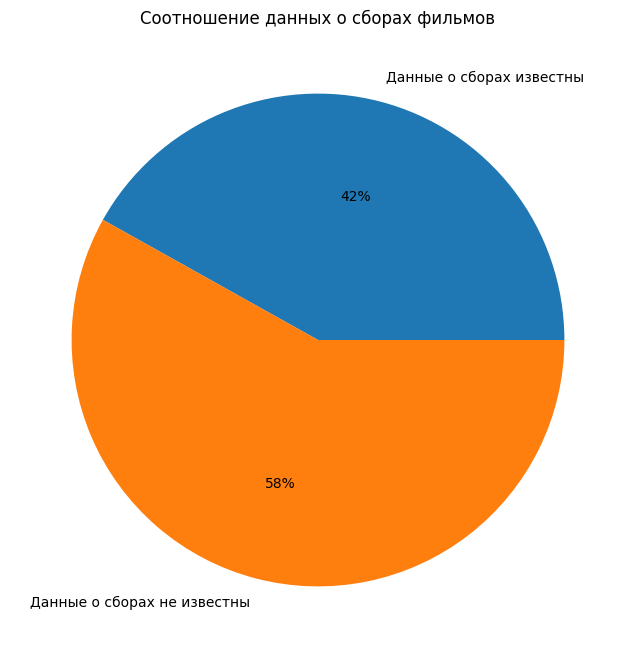

In [257]:
# Проверими, какое количество данных о сборах нам известно
plt.figure(figsize=(16, 8))
plt.pie((data[data['box_office'] > 0]['box_office'].count(), data[data['box_office'] <= 0]['box_office'].count()),
        labels=('Данные о сборах известны', 'Данные о сборах не известны'), autopct='%1.0f%%')

plt.title('Соотношение данных о сборах фильмов')
plt.show()

Мы видим, что данные о сборах опубликовало `42%` фильмов, что чуть меньше половины

In [258]:
data_pivot = data.pivot_table(index='year', values='box_office', aggfunc=('count', 'sum'))
data_pivot

,count,sum
year,,
2010,980,"2,428,654.0"
2011,622,"14,102,765.0"
2012,593,"6,955,423.0"
2013,630,"29,799,706.2"
2014,806,"7,444,951,859.2"
2015,705,"39,497,365,196.4"
2016,817,"47,866,105,214.9"
2017,505,"48,563,707,217.5"
2018,891,"49,668,403,134.3"


In [259]:
# При исследовательском анализе нам не нужно проводить операцию с данными, поэтому мы можем заменить все 0 на NaN

# Ставим года как индекс 
data_pivot_table = pd.DataFrame(index=sorted(data['year'].unique()))
# Считаем общее количество записей за год
data_pivot_table['count'] = data.groupby(['year'])['box_office'].count()
# Заменяем 0 на пропуски
data['box_office'].replace(0, np.nan, inplace=True)
# Считаем количество фильмов, у которых известны данные о сборах
data_pivot_table['known'] = data.groupby(['year'])['box_office'].count()
# Считаем количество фильмов, у которых неизвестны данные о сборах 
data_pivot_table['unknown'] = data_pivot_table['count'] - data_pivot_table['known']
# Считаем общие сборы по годам
data_pivot_table['box_office'] = data.groupby(['year'])['box_office'].sum()
data_pivot_table['percent'] = data_pivot_table['known'] / data_pivot_table['count'] * 100  # Считаем процент

data_pivot_table

,count,known,unknown,box_office,percent
2010,980,101,879,"2,428,654.0",10.3
2011,622,109,513,"14,102,765.0",17.5
2012,593,123,470,"6,955,423.0",20.7
2013,630,179,451,"29,799,706.2",28.4
2014,806,273,533,"7,444,951,859.2",33.9
2015,705,462,243,"39,497,365,196.4",65.5
2016,817,524,293,"47,866,105,214.9",64.1
2017,505,357,148,"48,563,707,217.5",70.7
2018,891,475,416,"49,668,403,134.3",53.3
2019,930,530,400,"48,425,708,779.6",57.0


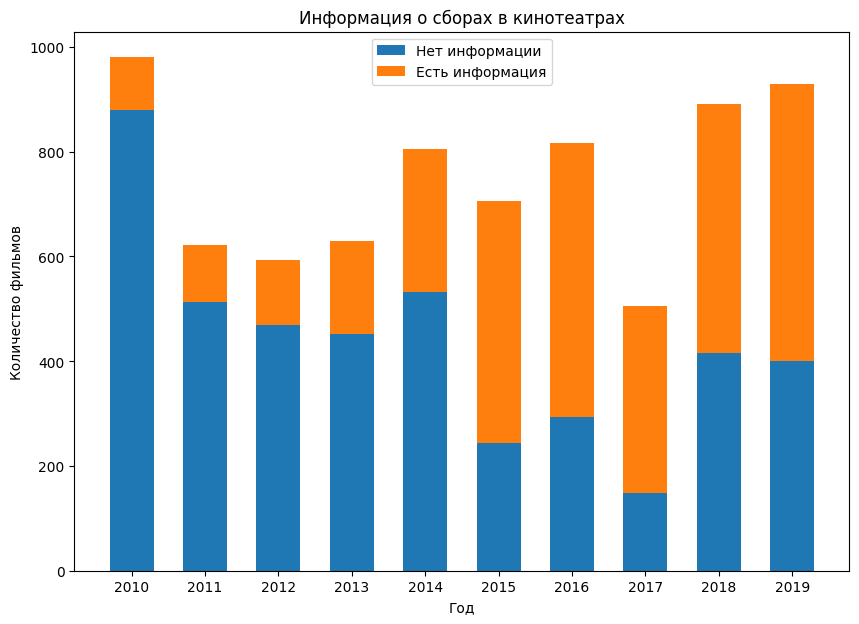

In [260]:
fig = plt.subplots(figsize=(10, 7))
p1 = plt.bar(data_pivot_table.index, data_pivot_table['unknown'], width=0.6)
p2 = plt.bar(data_pivot_table.index, data_pivot_table['known'], bottom=data_pivot_table['unknown'], width=0.6)

plt.xticks(range(2010, 2020, 1))
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.title('Информация о сборах в кинотеатрах')
plt.legend((p1[0], p2[0]), ('Нет информации', 'Есть информация'))

plt.show()

Мы можем наблюдать тенденцию, что с годами количество фильмов, которые стали указывать кассовые сборы, увеличилось. Количество фильмов на протяжении времени росло, однако есть 3 аномальных года: 2010, 2015, 2017. Посмотрим, как с течением времени меняется процент фильмов, которые указывают информацию о сборах

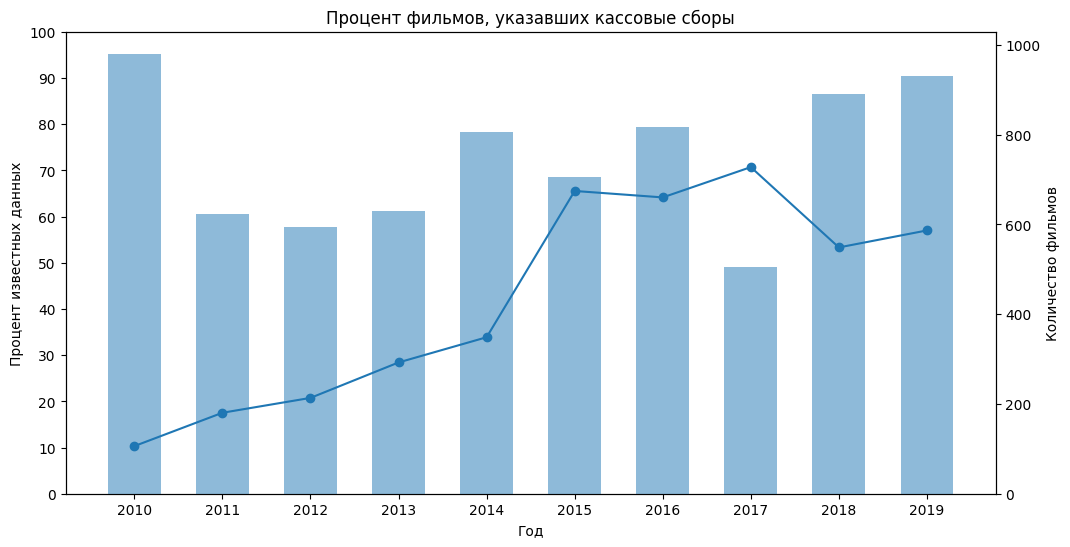

In [261]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data_pivot_table.index, data_pivot_table['percent'], marker='o')
ax1.set_yticks(range(0, 101, 10))
ax1.set_xticks(range(2010, 2020, 1))
ax1.set_ylabel('Процент известных данных')
ax1.set_xlabel('Год')

ax2 = ax1.twinx()
ax2.bar(data_pivot_table.index, data_pivot_table['count'], width=0.6, alpha=0.5)
ax2.set_ylabel('Количество фильмов')

plt.title('Процент фильмов, указавших кассовые сборы')

plt.show()

Наиболее полно представлен 2016-й год, потому что он 3-й по количеству выпущенных в прокат фильмов, однако в отличие от 2018 и 2019 годов, процент фильмов, данные о сборах которых известны, сильно больше.
<br>
<b>В 2016-м году вышло 770 фильмов, и нам известны данные о сборах 549 фильмов, что составляет 71% от общего числа фильмов, вышедших в этом году.<b>
<br>
<b>Период с 2015-го по 2019-й представлен полнее всего, потому что процент известных данных не падает ниже 50%</b> 

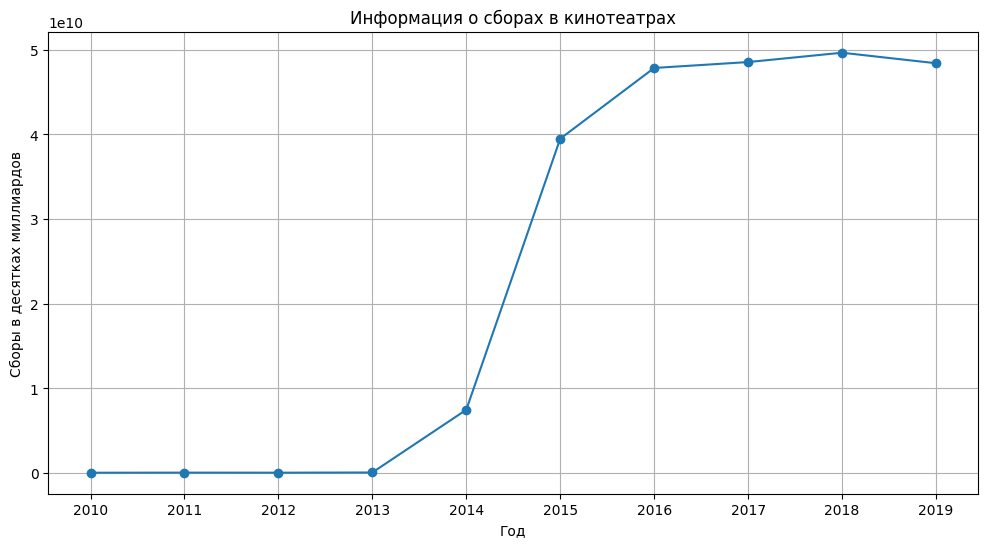

In [262]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data_pivot_table.index, data_pivot_table['box_office'], marker='o')
ax1.set_xticks(range(2010, 2020, 1))
plt.xlabel('Год')
plt.ylabel('Сборы в десятках миллиардов')
plt.title('Информация о сборах в кинотеатрах')

plt.grid()
plt.show()

Мы видим резкий рост с 2014-го по 2016-й года, однако это отчасти обусловлено том, что в эти года значительно увеличилось количество фильмов, которые публикуют данные о сборах. Если смотреть на ситуацию в целом, то с 2016-го по 2019-й сумма сборов упала, особенно, учитывая, что количество фильмов возросло, исключая 2017-й год  

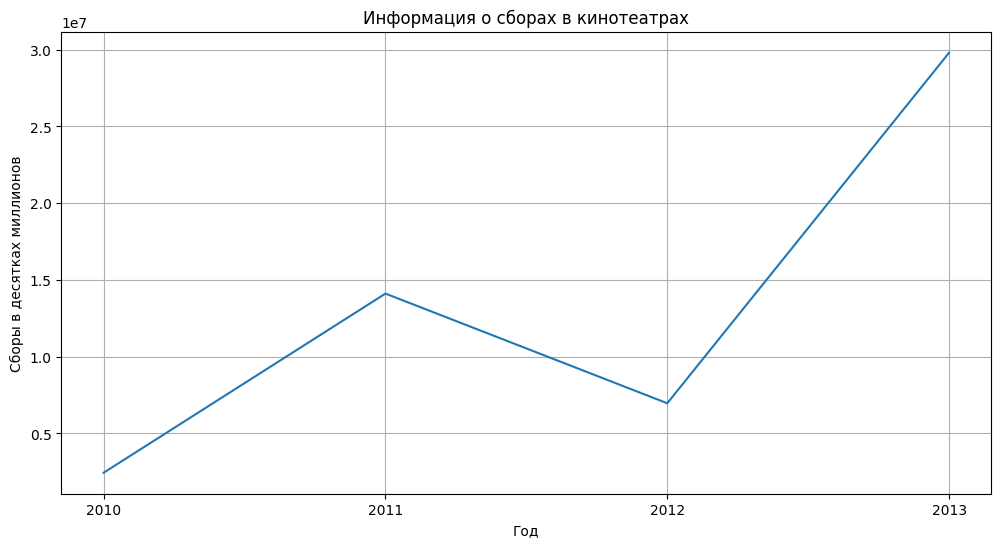

In [263]:
# Посмотрим статистику для 10-13 годов
data_pivot_table.iloc[:4]['box_office'].plot(kind='line', figsize=(12, 6))
plt.xticks(range(2010, 2014, 1))
plt.xlabel('Год')
plt.ylabel('Сборы в десятках миллионов')
plt.title('Информация о сборах в кинотеатрах')

plt.grid()
plt.show()

In [264]:
data_pivot = data.pivot_table(index='year', values='box_office', aggfunc=('min', 'max', 'sum'))
data_pivot['min per full film'] = data[data['box_office'] > 2 * 10 ** 5].groupby(['year'])['box_office'].min()
data_pivot

,max,min,sum,min per full film
year,,,,
2010,"1,446,400.0",75.0,"2,428,654.0","245,630.0"
2011,"11,618,085.0",125.0,"14,102,765.0","421,940.0"
2012,"2,311,220.0",80.0,"6,955,423.0","288,306.0"
2013,"19,957,031.5",40.0,"29,799,706.2","313,596.0"
2014,"1,016,410,635.3",50.0,"7,444,951,859.2","223,251.0"
2015,"1,658,861,425.5",100.0,"39,497,365,196.4","214,014.5"
2016,"2,048,126,108.0",200.0,"47,866,105,214.9","201,949.5"
2017,"2,779,686,144.0","7,900.0","48,563,707,217.5","206,188.0"
2018,"2,271,754,004.5","41,225.0","49,668,403,134.3","214,749.0"


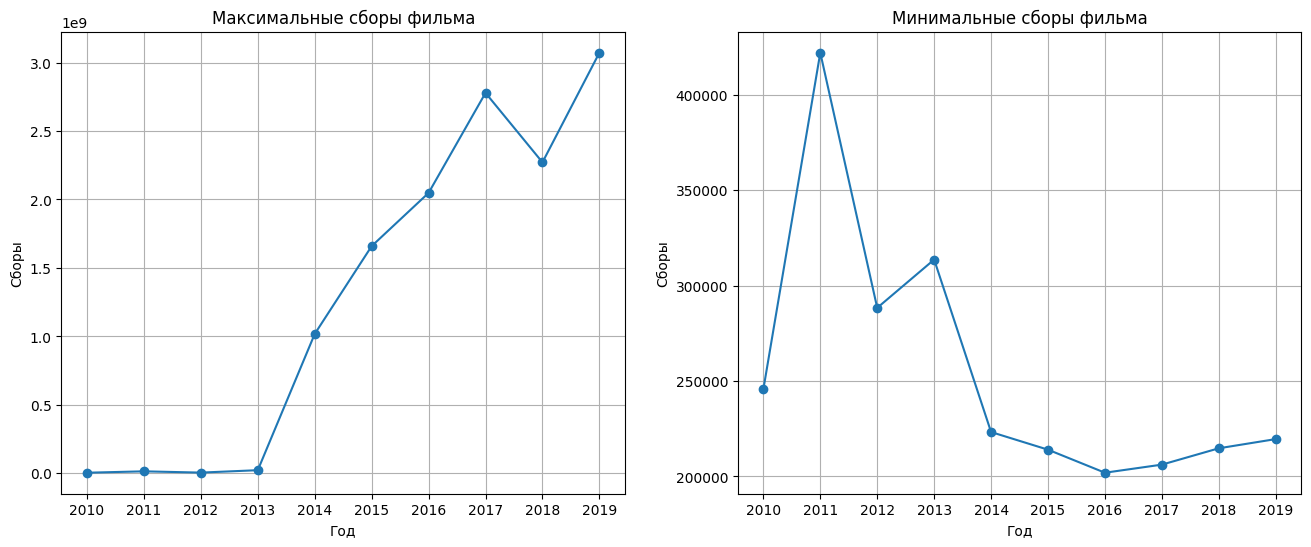

In [265]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
data_pivot['max'].plot(kind='line', marker='o')
plt.xticks(range(2010, 2020, 1))
plt.title('Максимальные сборы фильма')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.grid()

plt.subplot(1, 2, 2)
data_pivot['min per full film'].plot(kind='line', marker='o')
plt.xticks(range(2010, 2020, 1))
plt.title('Минимальные сборы фильма')
plt.xlabel('Год')
plt.ylabel('Сборы')

plt.grid()
plt.show()

Ранее мы определили границу в 200 000, поэтому создали отдельный столбце с минимальными сборами, отфильтровав по границе. Мы видим, что начиная с 14-го года, минимальные сборы примерно на одном уровне. В период с 10-го по 14-й года данные очень разнятся, однако причина тому отсутствие информации о сборах в принципе.
<br>
<br>
Рост максимальных планомерно растет, из-за экономического фактора, увеличения того количества данных о сборах, количества фильмов
 

In [266]:
data_pivot = data.pivot_table(index='year', values='box_office', aggfunc=('mean', 'median'))
data_pivot.rename(columns={'mean': 'mean per minute', 'median': 'median per minute'}, inplace=True)
data_pivot['mean per full film'] = data[data['box_office'] > 2 * 10 ** 5].groupby(['year'])['box_office'].mean()
data_pivot['median per full film'] = data[data['box_office'] > 2 * 10 ** 5].groupby(['year'])['box_office'].median()
data_pivot

,mean per minute,median per minute,mean per full film,median per full film
year,,,,
2010,"24,046.1","1,710.0","846,015.0","846,015.0"
2011,"129,383.2","3,000.0","4,300,278.3","860,810.0"
2012,"56,548.2","6,220.0","743,232.9","470,427.0"
2013,"166,478.8","3,580.0","4,469,740.6","930,412.3"
2014,"27,270,885.9","20,400.0","76,702,188.8","1,819,529.0"
2015,"85,492,132.5","5,003,450.2","100,748,203.1","10,518,878.5"
2016,"91,347,529.0","3,957,926.0","107,313,542.3","7,471,464.3"
2017,"136,032,793.3","9,968,340.0","141,580,809.9","11,031,012.0"
2018,"104,565,059.2","8,891,102.2","109,637,538.7","10,583,414.4"


Мы можем наблюдать, что количество фильмов, для которых сборы указаны за минуты очень велико, и тенденция указывать сборы за минуту сохраняется до 2014-го года. Далее уже большее количество фильмов указывают сборы за весь фильм, потому что медианные значения до 2014-го года разительно отличаются, а уже после значения становятся близки. После 2016-го года медианные значения еще больше приближаются друг к другу 

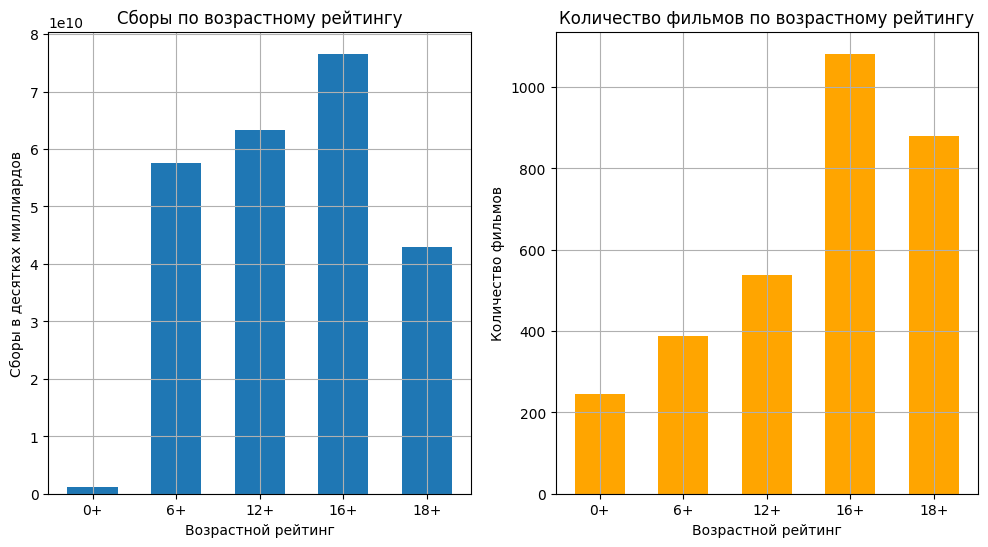

In [267]:
data_pivot = data.pivot_table(index='age_restriction', values='box_office', aggfunc='sum')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(np.arange(5), data_pivot['box_office'], width=0.6)
plt.xticks(np.arange(5), ('0+', '6+', '12+', '16+', '18+'))
# plt.yticks(np.arange(0, 8*10**10, 10**10))
plt.ylabel('Сборы в десятках миллиардов')
plt.xlabel('Возрастной рейтинг')
plt.title('Сборы по возрастному рейтингу')
plt.grid()

data_pivot = data.pivot_table(index='age_restriction', values='box_office', aggfunc='count')
plt.subplot(1, 2, 2)
plt.bar(np.arange(5), data_pivot['box_office'], width=0.6, color='orange')
plt.xticks(np.arange(5), ('0+', '6+', '12+', '16+', '18+'))
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Количество фильмов')
plt.title('Количество фильмов по возрастному рейтингу')
plt.grid()

plt.show()

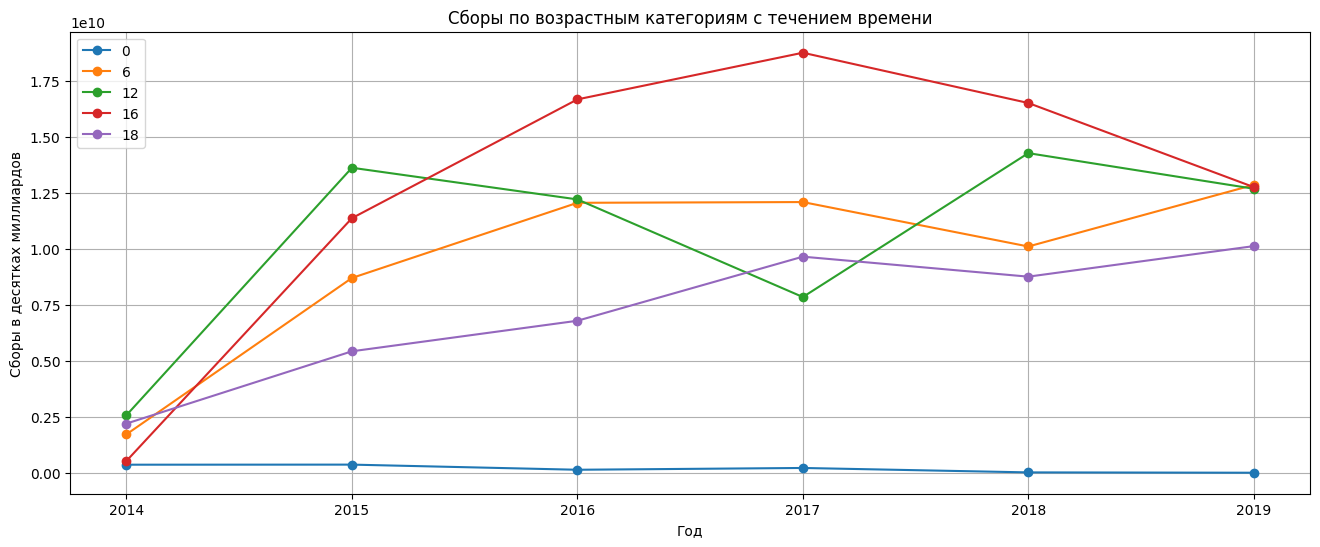

In [268]:
data_pivot = data.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(data_pivot.iloc[4:], marker='o', label=data_pivot.columns)
ax.legend(loc='upper left')
ax.set_ylabel('Сборы в десятках миллиардов')
ax.set_xlabel('Год')

plt.title('Сборы по возрастным категориям с течением времени')

plt.grid()
plt.show()

#### Вывод:
Всего данные о сборах опубликовало `42%` фильмов, что чуть меньше половины, однако мы можем наблюдать тенденцию, что с годами количество фильмов, которые стали указывать кассовые сборы, увеличилось. Количество фильмов на протяжении времени росло, <b>однако есть 3 аномальных года: 2010, 2015, 2017</b>. 
<br>
Если говорить про то, какой процент фильмов указал данные о сборах, то наиболее полно представлен 2016-й год, потому что он 3-й по количеству выпущенных в прокат фильмов, однако в отличие от 2018 и 2019 годов, процент фильмов, данные о сборах которых известны, сильно больше.
<br>
<b>В 2016-м году вышло 770 фильмов, и нам известны данные о сборах 549 фильмов, что составляет 71% от общего числа фильмов, вышедших в этом году.</b>
<br>
<b>Период с 2015-го по 2019-й представлен полнее всего, потому что процент известных данных не падает ниже 50%</b> 

<br>
<br>

Мы так же можем подметить, что тенденция указывать сборы за минуту сохраняется до 2014-го года. Далее уже большее количество фильмов начинает указывать сборы за весь фильм, поэтому медианные значения до 2014-го года разительно отличаются, а уже после значения становятся близки. После 2016-го года медианные значения еще больше приближаются друг к другу 
<br>
Мы видим, что начиная с 14-го года, минимальные сборы примерно на одном уровне. В период с 10-го по 14-й года данные очень разнятся, однако причина тому отсутствие информации о сборах в принципе.
Рост максимальных планомерно растет, из-за экономического фактора, увеличения того количества данных о сборах, количества фильмов

<br>
<br>

Больше всего сборов у фильмов с возрастной категорией `16+`, однако сборы не сильно ушли от возрастных категорий 6+ и 12+. На графике выделяется категория 0+, которая в сравнении с остальными почти не собрала денег, и 18+, которая собрала меньше даже по сравнению с категорией 6+. Причиной тому может быть то, что у совершеннолетних людей нет возможности ходить в кино в связи с учебой, работой. Если говорить про количество фильмов, то фильмов с категорией 18+ сильно больше, чем фильмов с категорией 6+ и 12+, разрушает гипотезу о том, что у таких фильмов нет сборов, потому что режиссеры предпочитают снимать для младшей аудитории.
<br>
Рассматривая динамику сборов по категориям за каждый год, мы можем наблюдать, что сборы планомерно растут. После 2017-го года сборы фильмов с рейтингом 16+ начали падать, а в 2019-м сборы фильмов с рейтингом 18+ слегка выросли. Мы также можем наблюдать, что в 2017 фильмы с рейтингом 12+ очень резко просели, однако потом вернулись к значению 2016-го года. Интересным примечанием является то, что в 2019-м году сборы фильмов с рейтингом 6+, 12+, 16+ находились примерно на одном уровне 


### Исследование фильмов, получивших государственную поддержку

In [269]:
# Ранее мы создали отдельный датафрейм, в который перенесли фильмы, получившую государственную поддержку 
gov_supported_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 1281 to 7475
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  332 non-null    object        
 1   pu_number              332 non-null    int64         
 2   show_start_date        332 non-null    datetime64[ns]
 3   film_type              332 non-null    object        
 4   film_studio            332 non-null    object        
 5   production_country     332 non-null    object        
 6   director               332 non-null    object        
 7   producer               332 non-null    object        
 8   age_restriction        332 non-null    int8          
 9   refundable_support     332 non-null    int64         
 10  nonrefundable_support  332 non-null    int64         
 11  budget                 332 non-null    int64         
 12  financing_source       332 non-null    object        
 13  rating

Мы видим, что в датафрейме у нас всего 329 фильмов и есть только 16 пропусков в столбце `rating`. Посмотрим, как средства выделяются в зависимости от типа и жанра, а также медианную и среднюю сумму на выделение, а так же как динамику выделения бюджета на протижении времени, а также какой процент от бюджета составляет государственная поддержка, медианную, среднюю и по годам 

In [270]:
gov_supported_data

,title,pu_number,show_start_date,film_type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,rating,genres,box_office,full_support,year,main_country,main_director,main_genre,gov_support_percent
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0,26500000,79411900,Министерство культуры,8.1,"драма,мелодрама","365,353.6",26500000,2013,Россия,А.Атанесян,драма,33.4
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12,0,26000000,37142857,Министерство культуры,NaN,Unknown,"28,140.0",26000000,2014,Россия,А.Якимчук,Unknown,70.0
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0,107847945,176023490,Фонд кино,5.3,"комедия,фантастика","19,957,031.5",107847945,2013,Россия,Р.Давлетьяров,комедия,61.3
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0,28000000,40574140,Министерство культуры,4.2,драма,"55,917.5",28000000,2014,Россия,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.0
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0,25000000,40015122,Министерство культуры,6.4,драма,"232,100.0",25000000,2014,Россия,М.Угаров,драма,62.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12,100000000,400000000,980000000,Фонд кино,6.0,"история,биография,драма","717,703,185.5",500000000,2019,Россия,А.Кравчук,история,51.0
7463,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",6,100000000,0,190000000,Фонд кино,6.7,"мультфильм,приключения,семейный","501,069,235.0",100000000,2019,Россия,Д.Шмидт,мультфильм,52.6
7471,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12,100000000,400000000,944000000,Фонд кино,5.7,"фантастика,боевик",0.0,500000000,2019,Россия,Ф.Бондарчук,фантастика,53.0
7473,Я свободен,111023019,2019-12-26,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,12,0,30000000,46154000,Министерство культуры,5.9,драма,0.0,30000000,2019,Россия,И.Северов,драма,65.0


In [271]:
# Создадим сводную таблицу со всеми интересующими нас метриками. В качестве индекса будут выступать года, а в качестве функций: сумма, среднее и медианное значения
gov_supported_data_pivot = gov_supported_data.pivot_table(index='year',
                                                          values=('rating', 'gov_support_percent', 'refundable_support',
                                                                  'nonrefundable_support', 'budget', 'box_office',
                                                                  'full_support'),
                                                          aggfunc=('sum', 'mean', 'median'))

gov_supported_data_pivot.columns = list(map("_".join, gov_supported_data_pivot.columns))
gov_supported_data_pivot

,box_office_mean,box_office_median,box_office_sum,budget_mean,budget_median,budget_sum,full_support_mean,full_support_median,full_support_sum,gov_support_percent_mean,gov_support_percent_median,gov_support_percent_sum,nonrefundable_support_mean,nonrefundable_support_median,nonrefundable_support_sum,rating_mean,rating_median,rating_sum,refundable_support_mean,refundable_support_median,refundable_support_sum
year,,,,,,,,,,,,,,,,,,,,,
2013,"10,161,192.6","10,161,192.6","20,322,385.1","127,717,695.0","127,717,695.0",255435390,"67,173,972.5","67,173,972.5",134347945,47.3,47.3,94.6,"67,173,972.5","67,173,972.5",134347945,6.7,6.7,13.4,0.0,0.0,0
2014,"63,588,885.4","5,504,517.8","1,017,422,166.6","81,405,298.9","61,036,441.5",1302484783,"35,750,143.7","27,500,000.0",572002299,55.1,58.2,882.1,"31,312,643.7","27,500,000.0",501002299,6.0,6.4,90.1,"4,437,500.0",0.0,71000000
2015,"67,270,760.7","7,829,063.8","5,785,285,418.1","89,984,525.7","57,493,985.5",7738669207,"42,514,435.6","30,000,000.0",3656241459,56.2,62.4,"4,833.0","35,105,678.4","27,755,000.0",3019088340,6.1,6.2,509.6,"7,408,757.2",0.0,637153119
2016,"99,700,128.5","16,814,329.5","6,081,707,839.1","123,851,520.5","69,883,049.0",7554942748,"70,543,532.5","35,000,000.0",4303155482,57.5,64.0,"3,505.5","55,436,975.1","30,000,000.0",3381655482,5.7,5.8,323.6,"15,106,557.4",0.0,921500000
2017,"265,001,836.6","48,557,861.0","10,865,075,301.0","172,126,160.2","78,096,315.0",7057172568,"77,657,845.4","40,000,000.0",3183971662,50.6,52.5,"2,075.5","60,112,799.5","30,000,000.0",2464624781,6.0,6.2,234.0,"17,545,045.9","5,000,000.0",719346881
2018,"177,394,089.5","27,023,390.3","9,934,069,010.2","125,011,858.9","90,324,563.5",7000664099,"61,553,026.2","45,000,000.0",3446969465,54.5,59.4,"3,051.3","49,731,597.6","30,500,000.0",2784969465,6.0,6.2,318.1,"11,821,428.6",0.0,662000000
2019,"120,137,535.1","12,390,946.9","8,409,627,454.6","181,755,237.3","78,388,683.0",12722866609,"70,057,142.9","40,000,000.0",4904000000,50.8,58.6,"3,555.6","56,800,000.0","35,000,000.0",3976000000,6.2,6.2,413.8,"13,257,142.9",0.0,928000000


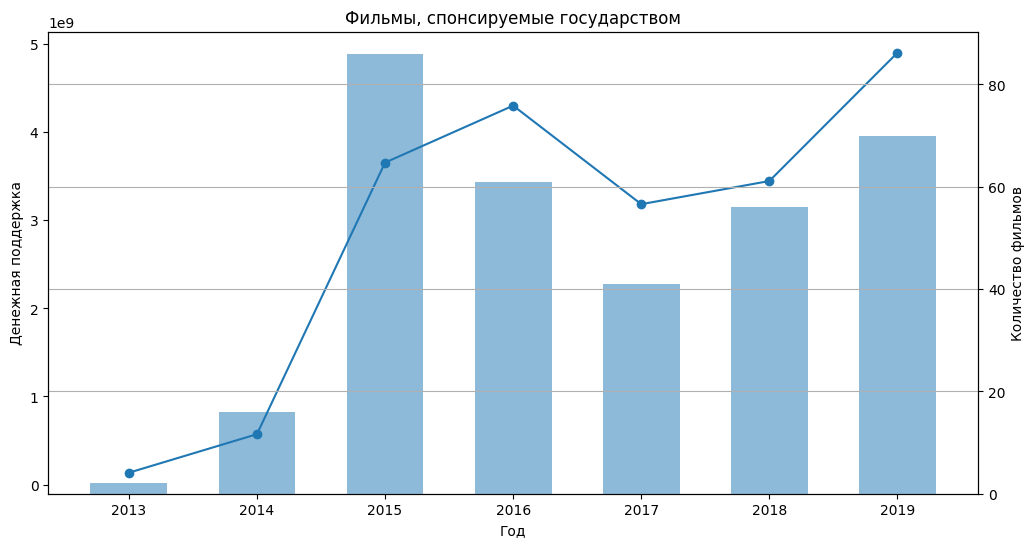

In [272]:
# Для начала посмотрим, какое коилчество фильмов выходило в каждый год

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(gov_supported_data_pivot.index, gov_supported_data_pivot['full_support_sum'], marker='o')
ax1.set_xticks(range(2013, 2020, 1))
ax1.set_ylabel('Денежная поддержка')
ax1.set_xlabel('Год')

ax2 = ax1.twinx()
ax2.bar(gov_supported_data_pivot.index, gov_supported_data.groupby(['year'])['title'].count(), width=0.6, alpha=0.5)
ax2.set_ylabel('Количество фильмов')
ax2.set_xlabel('Год')

plt.title('Фильмы, спонсируемые государством')

plt.grid()
plt.show()

Мы видим, что сумма средств соответствует количеству фильмов, однако аномалией является 2016-й год. Стоит ответить, что больше всего фильмов было спонсировано в 2015-м году

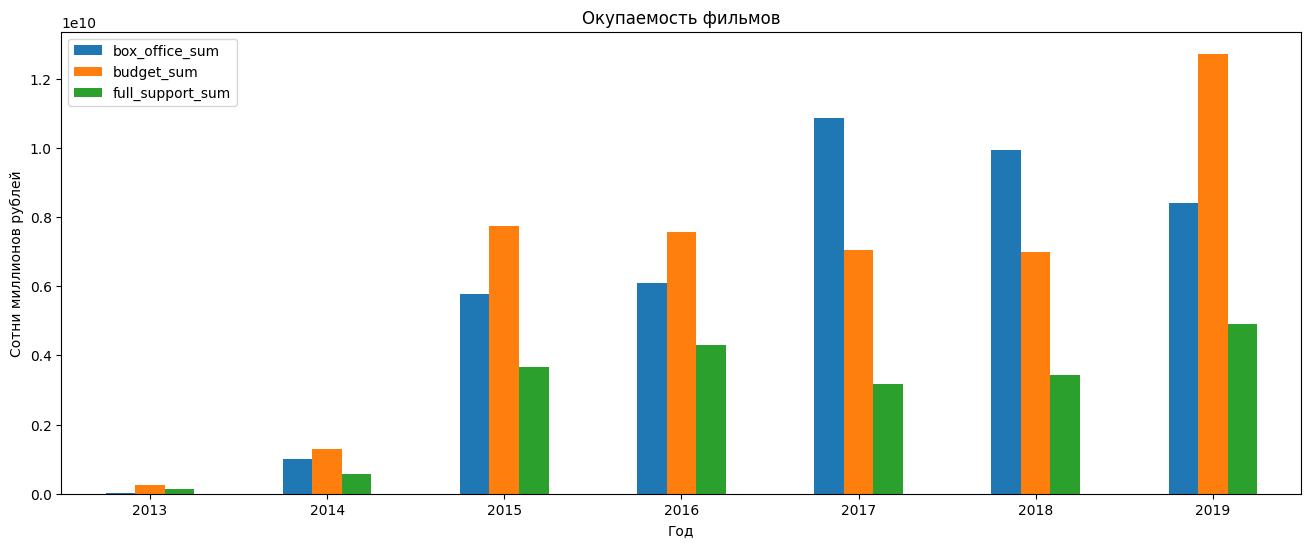

In [273]:
# Посмотрим на окупаемость фильмов, которых спонсировало государство
gov_supported_data_pivot[['box_office_sum', 'budget_sum', 'full_support_sum']].plot(kind='bar', figsize=(16, 6))
plt.xticks(rotation=0)
plt.ylabel('Сотни миллионов рублей')
plt.xlabel('Год')
plt.title('Окупаемость фильмов')

plt.show()

Мы видим, что фильмы, спонсируемые государством не окупались, за исключением 2017-го и 2018-го годов. Однако сборы фильмов всегда оказывались больше, чем количество средств, выделенное государством. Следует помнить, что в столбец `budget` уже заложена сумма государственной поддержки. Посмотрим, те же метрики, только их медианные и средние значения

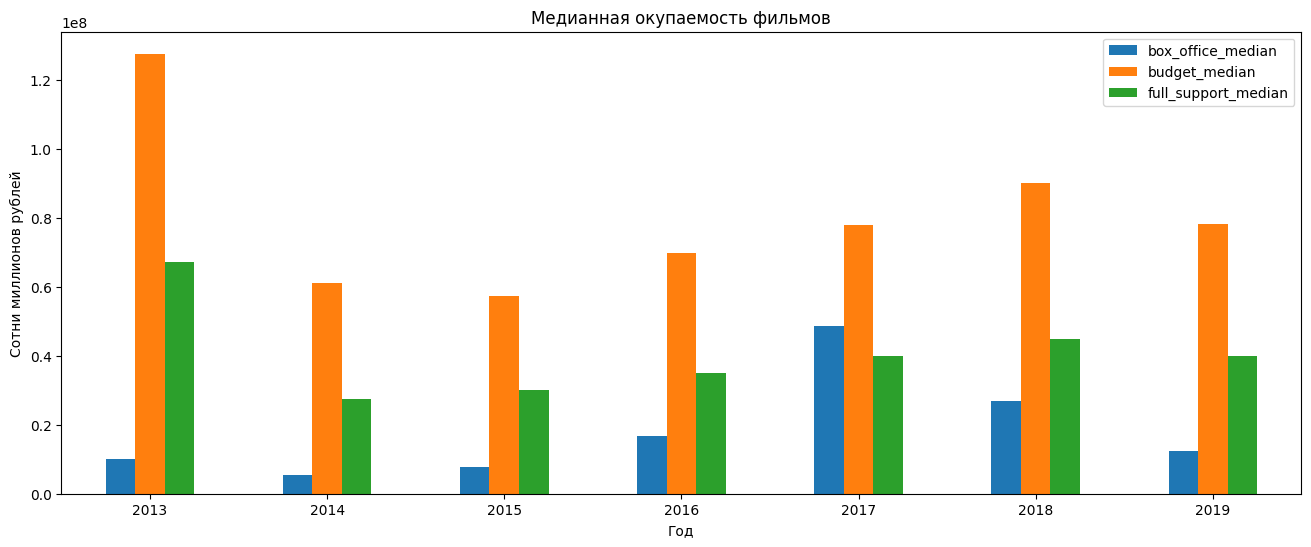

In [274]:
gov_supported_data_pivot[['box_office_median', 'budget_median', 'full_support_median']].plot(kind='bar',
                                                                                             figsize=(16, 6))
plt.xticks(rotation=0)
plt.ylabel('Сотни миллионов рублей')
plt.xlabel('Год')
plt.title('Медианная окупаемость фильмов')

plt.show()

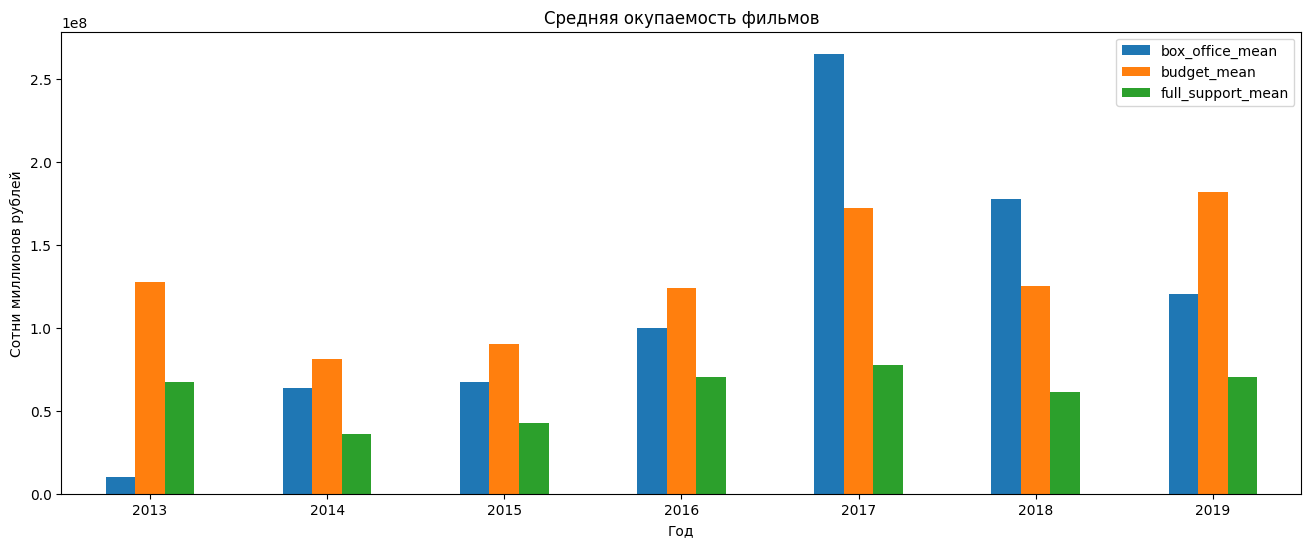

In [275]:
gov_supported_data_pivot[['box_office_mean', 'budget_mean', 'full_support_mean']].plot(kind='bar', figsize=(16, 6))
plt.xticks(rotation=0)
plt.ylabel('Сотни миллионов рублей')
plt.xlabel('Год')
plt.title('Средняя окупаемость фильмов')

plt.show()

Мы можем наблюдать, выброс в 2017-м году, следовательно, был фильм, который собрал очень много средств, или же там было мало фильмов с малыми сборами.

In [276]:
gov_supported_data[gov_supported_data['year'] == 2017].sort_values(by='box_office', ascending=False)[
    ['title', 'full_support', 'gov_support_percent', 'budget', 'box_office']].head()

,title,full_support,gov_support_percent,budget,box_office
5650,Движение вверх,400000000,67.8,590192191,"2,779,686,144.0"
5502,Последний богатырь,100000000,28.4,352477575,"1,655,037,688.0"
5638,Ёлки Новые,100000000,57.3,174381922,"855,451,052.0"
5656,Три богатыря и принцесса Египта,50000000,28.7,174464395,"759,226,773.0"
5499,Салют-7,225000000,45.6,493733957,"752,679,777.0"


Действительно, у нас есть целых 2 фильма, которые собрали в прокате больше миллиарда рублей, они и являются причиной этого выброса

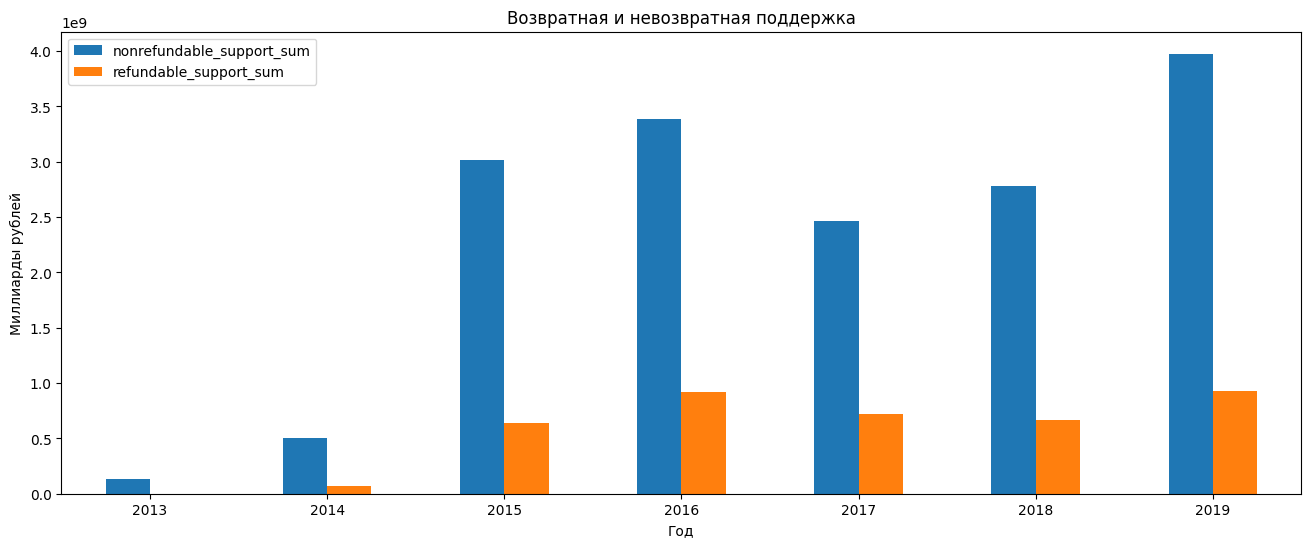

In [277]:
gov_supported_data_pivot[['nonrefundable_support_sum', 'refundable_support_sum']].plot(kind='bar', figsize=(16, 6))
plt.xticks(rotation=0)
plt.ylabel('Миллиарды рублей')
plt.xlabel('Год')
plt.title('Возвратная и невозвратная поддержка')

plt.show()

Мы видим, что государство спонсировало фильмы на внушительную сумму на безвозвратной основе. Мы так же можем наблюдать то, что государство начало резко спонсировать фильмы, начиная с 2015-го года. В 2017 и 2018-м годах сумма средств, выделяемых государством уменьшилось, однако это можно обосновать тем, что количество фильмов в эти года так же было невелико

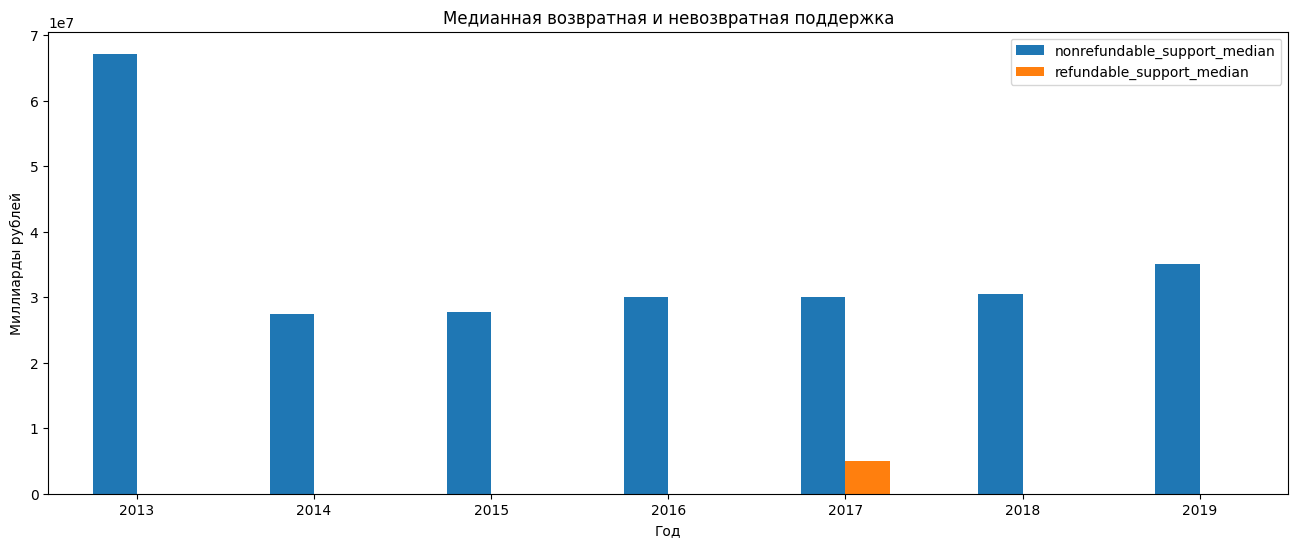

In [278]:
gov_supported_data_pivot[['nonrefundable_support_median', 'refundable_support_median']].plot(kind='bar',
                                                                                             figsize=(16, 6))
plt.xticks(rotation=0)
plt.ylabel('Миллиарды рублей')
plt.xlabel('Год')
plt.title('Медианная возвратная и невозвратная поддержка')

plt.show()

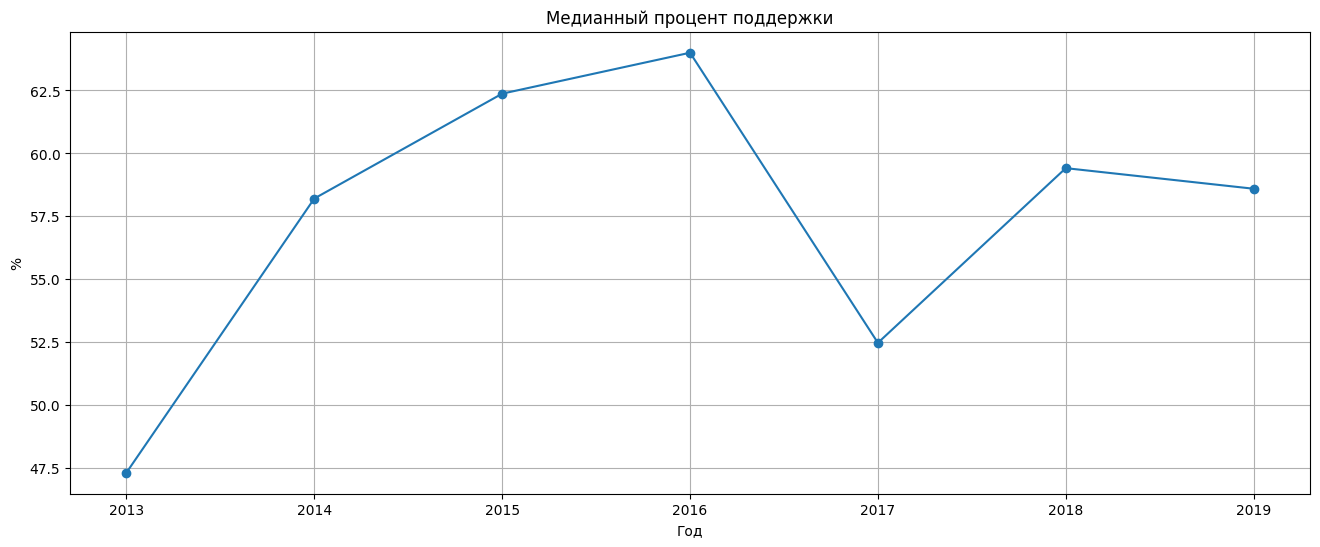

In [279]:
gov_supported_data_pivot['gov_support_percent_median'].plot(kind='line', figsize=(16, 6), marker='o')
plt.ylabel('%')
plt.xlabel('Год')
plt.title('Медианный процент поддержки')

plt.grid()
plt.show()

Мы видим, что медианный процент государственной поддержки возрастает, начиная с 2013-го года, после чего проседает в 2017-м. Медианный процент варьируется от 47.5% до 63%

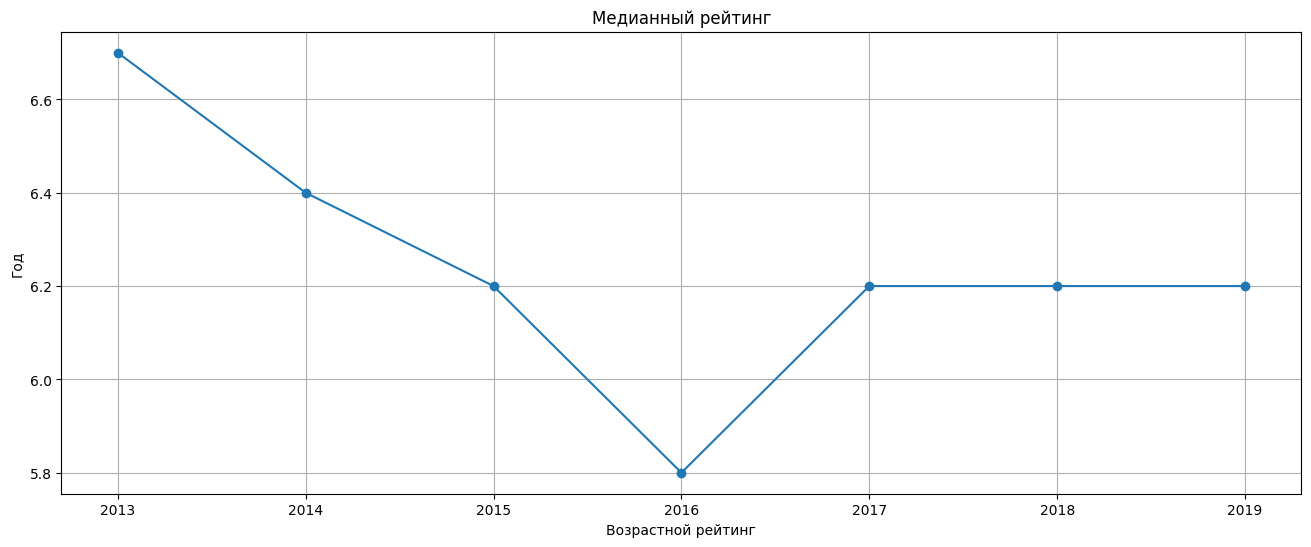

In [280]:
plt.figure(figsize=(16, 6))
plt.plot(gov_supported_data_pivot.index, gov_supported_data_pivot['rating_median'], marker='o')

plt.xlabel('Возрастной рейтинг')
plt.ylabel('Год')
plt.title('Медианный рейтинг')

plt.grid()
plt.show()

In [281]:
print(gov_supported_data['rating'].min())
print(gov_supported_data['rating'].max())

1.0
9.4


Мы видим, что с 2013 по 2016 медианный рейтинг фильмов, спонсируемых государством падал. С 2017-го по 2019-й рейтинг был на одном уровне

In [282]:
gov_supported_data_pivot = gov_supported_data.pivot_table(index='film_type', values='full_support', aggfunc='sum')
gov_supported_data_pivot

,full_support
film_type,
Анимационный,2570489465
Документальный,3000000
Художественный,17627198847


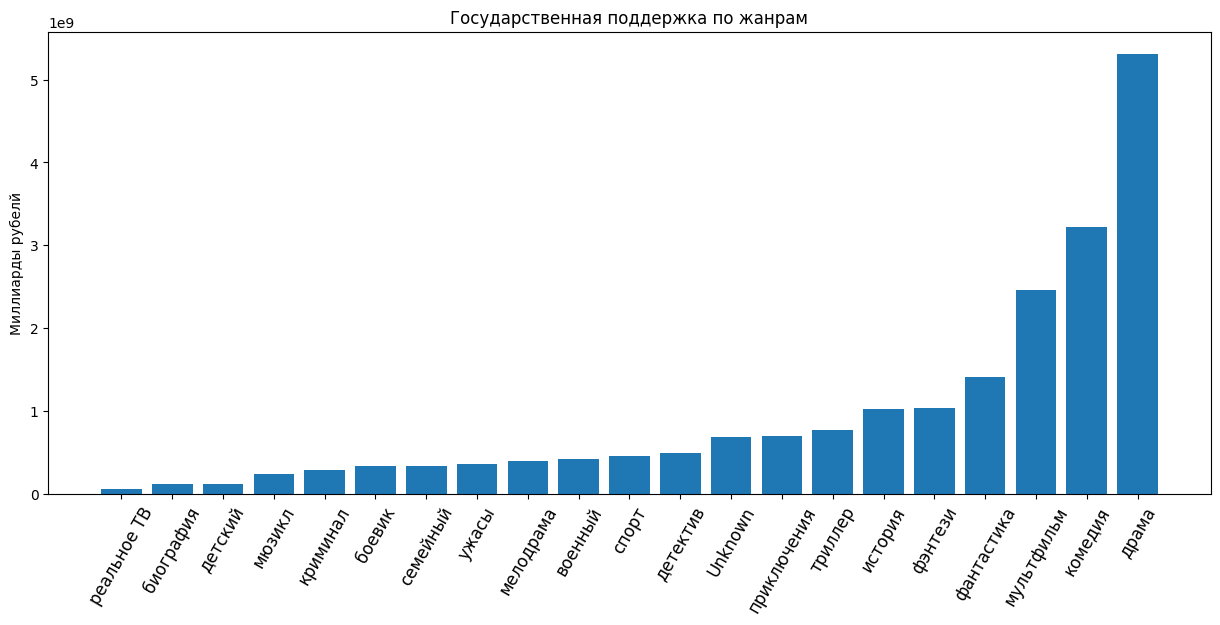

In [283]:
gov_supported_data_pivot = gov_supported_data.pivot_table(index='main_genre', values='full_support',
                                                          aggfunc='sum').sort_values('full_support', ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(gov_supported_data_pivot.index, gov_supported_data_pivot['full_support'])
plt.xticks(rotation=60, fontsize=12)
plt.ylabel('Миллиарды рубелй')
plt.title('Государственная поддержка по жанрам')

plt.show()

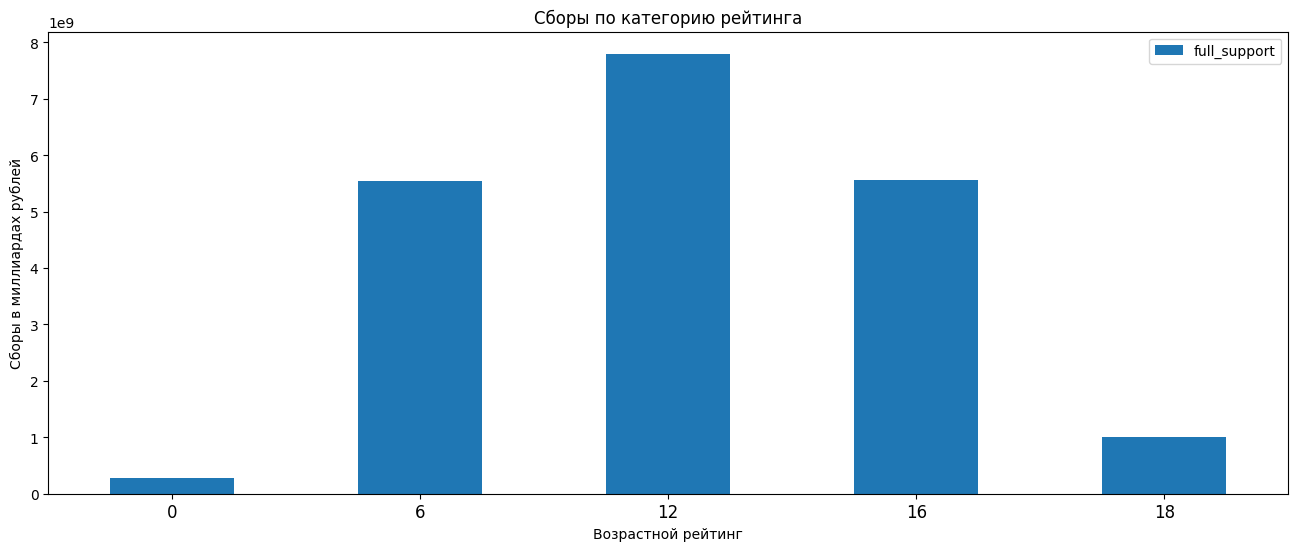

In [284]:
gov_supported_data_pivot = gov_supported_data.pivot_table(index='age_restriction', values='full_support',
                                                          aggfunc='sum').plot(kind='bar', figsize=(16, 6))
plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Сборы в миллиардах рублей')
plt.title('Сборы по категорию рейтинга')

plt.show()

#### Вывод:

Мы видим, что сумма средств соответствует количеству фильмов, однако аномалией является 2016-й год. Стоит ответить, что больше всего фильмов было спонсировано в 2015-м году

<br>
<br>

Мы видим, что фильмы, спонсируемые государством не окупались, за исключением 2017-го и 2018-го годов. Однако сборы фильмов всегда оказывались больше, чем количество средств, выделенное государством. Следует помнить, что в столбец `budget` уже заложена сумма государственной поддержки. Посмотрим, те же метрики, только их медианные и средние значения. В 2017-м было 2 фильма, которые собрали больше миллиарда, что спровоцировало выброс на графике со среднем значением сборов. Мы видим, что медианный процент государственной поддержки возрастает, начиная с 2013-го года, после чего проседает в 2017-м. Медианный процент варьируется от 47.5% до 63%

<br>
<br>

Государство спонсировало фильмы на внушительную сумму на безвозвратной основе. Мы так же можем наблюдать то, что государство начало резко спонсировать фильмы, начиная с 2015-го года. В 2017 и 2018-м годах сумма средств, выделяемых государством уменьшилась, однако это можно обосновать тем, что количество фильмов в эти года так же уменьшилось

<br>
<br>

С 2013 по 2016 медианный рейтинг фильмов, спонсируемых государством падал. С 2017-го по 2019-й рейтинг был на одном уровне. Самый высокий рейтинг для фильма с государственной поддержкой составил `9.4`, в то время как самый низкий составил `1.0`

<br>
<br>

Государство выделяло средства всего для на 3 вида фильмов: Художественный, анимационный, документальный. Документальные фильмы получили наименьшую поддержку, в то время как художественны — наибольшую.
Самыми спонсируемыми же жанрами являются <b>Драма, комедия, мультфильм</b>

<br>
<br>

Охотнее всего государство спонсирует фильмы с возрастным рейтингом 12+, далее идут рейтинги 6+ и 12+. Фильмы с рейтингом 18+ и 0+ государство спонсирует меньше всего  

### Общий вывод:

<b>Прокат мировых фильмов:</b>
<br>
Всего данные о сборах опубликовало `42%` фильмов, что чуть меньше половины, однако мы можем наблюдать тенденцию, что с годами количество фильмов, которые стали указывать кассовые сборы, увеличилось. Количество фильмов на протяжении времени росло, <b>однако есть 3 аномальных года: 2010, 2015, 2017</b>. 
<br>
Если говорить про то, какой процент фильмов указал данные о сборах, то наиболее полно представлен 2016-й год, потому что он 3-й по количеству выпущенных в прокат фильмов, однако в отличие от 2018 и 2019 годов, процент фильмов, данные о сборах которых известны, сильно больше.
<br>
<b>В 2016-м году вышло 770 фильмов, и нам известны данные о сборах 549 фильмов, что составляет 71% от общего числа фильмов, вышедших в этом году.</b>
<br>
<b>Период с 2015-го по 2019-й представлен полнее всего, потому что процент известных данных не падает ниже 50%</b> 

<br>
<br>

Мы так же можем подметить, что тенденция указывать сборы за минуту сохраняется до 2014-го года. Далее уже большее количество фильмов начинает указывать сборы за весь фильм, поэтому медианные значения до 2014-го года разительно отличаются, а уже после значения становятся близки. После 2016-го года медианные значения еще больше приближаются друг к другу 
<br>
Мы видим, что начиная с 14-го года, минимальные сборы примерно на одном уровне. В период с 10-го по 14-й года данные очень разнятся, однако причина тому отсутствие информации о сборах в принципе.
Рост максимальных планомерно растет, из-за экономического фактора, увеличения того количества данных о сборах, количества фильмов

<br>
<br>

Больше всего сборов у фильмов с возрастной категорией `16+`, однако сборы не сильно ушли от возрастных категорий 6+ и 12+. На графике выделяется категория 0+, которая в сравнении с остальными почти не собрала денег, и 18+, которая собрала меньше даже по сравнению с категорией 6+. Причиной тому может быть то, что у совершеннолетних людей нет возможности ходить в кино в связи с учебой, работой. Если говорить про количество фильмов, то фильмов с категорией 18+ сильно больше, чем фильмов с категорией 6+ и 12+, разрушает гипотезу о том, что у таких фильмов нет сборов, потому что режиссеры предпочитают снимать для младшей аудитории.
<br>
Рассматривая динамику сборов по категориям за каждый год, мы можем наблюдать, что сборы планомерно растут. После 2017-го года сборы фильмов с рейтингом 16+ начали падать, а в 2019-м сборы фильмов с рейтингом 18+ слегка выросли. Мы также можем наблюдать, что в 2017 фильмы с рейтингом 12+ очень резко просели, однако потом вернулись к значению 2016-го года. Интересным примечанием является то, что в 2019-м году сборы фильмов с рейтингом 6+, 12+, 16+ находились примерно на одном уровне 

<br>
<br>

<b>Фильмы, получившие государственную поддержку</b>
<br>
Мы видим, что сумма средств соответствует количеству фильмов, однако аномалией является 2016-й год. Стоит ответить, что больше всего фильмов было спонсировано в 2015-м году
<br>
Мы видим, что фильмы, спонсируемые государством не окупались, за исключением 2017-го и 2018-го годов. Однако сборы фильмов всегда оказывались больше, чем количество средств, выделенное государством. Следует помнить, что в столбец `budget` уже заложена сумма государственной поддержки. Посмотрим, те же метрики, только их медианные и средние значения. В 2017-м было 2 фильма, которые собрали больше миллиарда, что спровоцировало выброс на графике со среднем значением сборов.
<br>
Государство спонсировало фильмы на внушительную сумму на безвозвратной основе. Мы так же можем наблюдать то, что государство начало резко спонсировать фильмы, начиная с 2015-го года. В 2017 и 2018-м годах сумма средств, выделяемых государством уменьшилась, однако это можно обосновать тем, что количество фильмов в эти года так же уменьшилось. Медианный процент государственной поддержки возрастает, начиная с 2013-го года, после чего проседает в 2017-м. Медианный процент варьируется от 47.5% до 63%
<br>
С 2013 по 2016 медианный рейтинг фильмов, спонсируемых государством падал. С 2017-го по 2019-й рейтинг был на одном уровне. Самый высокий рейтинг для фильма с государственной поддержкой составил `9.4`, в то время как самый низкий составил `1.0`
<br>
Государство выделяло средства всего для на 3 вида фильмов: Художественный, анимационный, документальный. Документальные фильмы получили наименьшую поддержку, в то время как художественны — наибольшую.
Самыми спонсируемыми же жанрами являются <b>Драма, комедия, мультфильм</b>
<br>
Охотнее всего государство спонсирует фильмы с возрастным рейтингом 12+, далее идут рейтинги 6+ и 12+. Фильмы с рейтингом 18+ и 0+ государство спонсирует меньше всего  

<br>
<br>

<b>Проделанная работа:</b>
<br>

Мы заполнили пропуски в следующих столбцах:
- `production_country` удалили `2` пропуска, ибо данные в остальных столбцах отсутствуют
- `director` заполнили `9` пропусков значением `Unknown`
- `producer` заполнили `568` пропусков значением `Unknown`
- `generes`заполнили `975` пропусков значением `Unknown`

В остальных столбцах мы не смогли заполнить пропуски, потому что у нас недостаточно данных, чтобы корректно заполнить их. После предобработки данных мы создадим новую таблицу в которую перенесем строки, у которых нет пропусков в столбце `financing_source`. В столбце `box_office` у нас `4326` пропусков, которые обоснованы тем, что некоторые фильмы решили не публиковать данные о сборах

<br>

В таблицы были неявные дубликаты в столбцах `titile` и `pu_number`. Их появление в столбце `titile` обусловлено тем, что один и тот же фильм выходил в разное время, и, следовательно, получал разное прокатное удостоверение. Рейтинг у всех дубликатов был одинаковый, но разные сборы в столбце `box_office`. Мы оставили эти дубликаты
В столбце `pu_number` было обнаружено всего 4 дубликата, мы удалили их, потому что у этих фильмов нет значимых для нас данных, таких как информация о сборах, бюджете, и государственной поддержке.

<br>

- `film_type` — мы убрали пробелы перед и после слов. 
- `production_country` — мы привели все значения к единому стилю `Страна, Страна, ..., Страна`

Все столбцы мы постарались привести к единому стилю для дальнейшей обработки

<br>

У нас в датасете было 17 строк, у которых бюджет фильма меньше, чем государственная поддержка. Точнее, бюджет вообще не указан. Восстановить данные мы не можем, поэтому мы заполнили пропуски суммой, равной полной поддержки государства.
Государство спонсирует фильмы на "круглые" фиксированные суммы, то есть `100 000 000` и `150 000 000`.

В столбце `box_office` У нас представлено 2 вида кассовых сборов. За весь фильм и за минуту фильма. Мы определили границу в `200 000`, до которой сборы идут за минуту фильма, а после — за весь фильм

<br>

Мы добавили 4 новых столбца:
- `main_director` — выделили главного режиссера
- `main_genre` — выделили главный жанр
- `full_support` — общая сумма государственной поддержки (на возвратной и невозвратной основе) 
- `gov_support_percent` — какой процент от общего бюджета составила государственная поддержка  